# Group the Countries into Clusters

## Import Libraries

In [1]:
# Import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn")

## Read the Data

In [2]:
# Load the dataset
df_combined = pd.read_csv('averaged_final_2.csv')

## Inspect Data

In [3]:
# View the combined dataset
df_combined 

,Unnamed: 0,country,range,Voter turnout (highest score=1),Freedom of Religion (highest score=1),Urban population (% of total population),ethnicity_ratio,economic_stability_index,political_social_index,change,year
0,0,Australia,1990.0-1996.0,0.830000,0.9800,85.138714,0.840,-0.513375,0.316627,True,1996.0
1,1,Australia,1996.0-1998.0,0.825000,0.9800,84.569500,0.840,1.100448,0.320910,False,1998.0
2,2,Australia,1998.0-2001.0,0.826667,0.9800,84.235000,0.840,0.339552,0.324674,False,2001.0
3,3,Australia,2001.0-2004.0,0.836667,0.9800,84.342667,0.840,0.500816,0.328661,False,2004.0
4,4,Australia,2004.0-2007.0,0.830000,0.9800,84.701333,0.840,-0.382637,0.331623,True,2007.0
...,...,...,...,...,...,...,...,...,...,...,...
299,299,United States,2000.0-2004.0,0.440000,0.9800,79.495750,0.691,-0.727156,0.047302,False,2004.0
300,300,United States,2004.0-2008.0,0.462500,0.9800,80.183500,0.691,-0.970711,0.095831,True,2008.0
301,301,United States,2008.0-2012.0,0.460000,0.9850,80.860250,0.660,-1.919933,0.133142,False,2012.0
302,302,United States,2012.0-2016.0,0.432500,0.9925,81.578750,0.660,-0.718026,0.105266,True,2016.0


In [4]:
 def nan_analysis(df):
    # Count NaN values in each column
    nan_analysis = df.isna().sum()
    # Calculate percentage of NaN values
    nan_analysis_percent = (df.isna().mean() * 100).sort_values(ascending=False)
    # Combine NaN count and percentage into a DataFrame for better analysis
    nan_summary = pd.DataFrame({
        'NaN Count': nan_analysis,
        'Percentage': nan_analysis_percent
    }).sort_values(by='Percentage', ascending=False)
    return nan_summary[nan_summary['Percentage'] > 0]

In [5]:
# Check for missing values
nan_analysis(df_combined)

,NaN Count,Percentage


In [6]:
# Check the year range of each country and unique country names in each dataset
def check_year_country(df):
    if "country" not in df.columns or "year" not in df.columns:
        raise ValueError("The dataset must contain 'country' and 'year' columns.")

    year_summary = df.groupby("country")["year"].agg(["min", "max", "count"]).reset_index()
    year_summary.columns = ["country", "min_year", "max_year", "year_count"]

    unique_countries = df["country"].unique()
    unique_country_count = len(unique_countries)

    return year_summary, unique_countries, unique_country_count

In [7]:
# Check the year range of each country and unique country names in each dataset
check_year_country(df_combined)

(           country  min_year  max_year  year_count
 0        Australia    1996.0    2022.0          10
 1          Austria    1994.0    2019.0           9
 2          Belgium    1995.0    2019.0           7
 3           Canada    1997.0    2021.0           9
 4            Chile    1997.0    2021.0           7
 5         Colombia    1994.0    2022.0           8
 6       Costa Rica    1994.0    2022.0           8
 7          Czechia    1996.0    2021.0           8
 8          Denmark    1994.0    2022.0           9
 9          Estonia    1995.0    2023.0           8
 10         Finland    1995.0    2023.0           8
 11          France    1997.0    2022.0           6
 12         Germany    1994.0    2021.0           8
 13          Greece    1996.0    2023.0           9
 14         Hungary    1994.0    2022.0           8
 15         Iceland    1995.0    2021.0           9
 16         Ireland    1997.0    2020.0           6
 17          Israel    1996.0    2022.0          11
 18         

In [9]:
# Grouping by country and averaging numerical values
df_grouped = df_combined.groupby("country").mean(numeric_only=True)

# Standardizing the data for clustering
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_grouped)

## Dendrogram for Visualisation

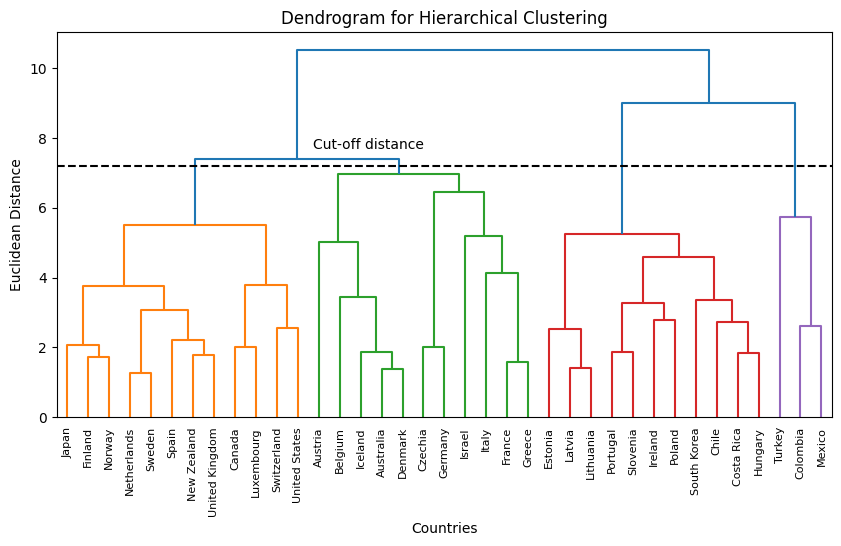

           Cluster_HC
country              
Australia           0
Austria             0
Belgium             0
Canada              3
Chile               2


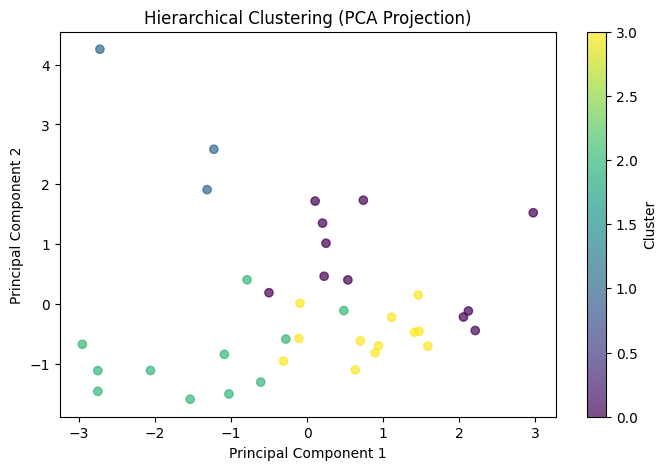

In [10]:
# Plot the dendrogram to visualize hierarchical clustering
country_names = df_grouped.index.tolist()
cutoff_distance = 7.2
plt.figure(figsize=(10, 5))
dendrogram = sch.dendrogram(sch.linkage(df_scaled, method='ward'), labels=country_names, leaf_rotation=90, color_threshold=cutoff_distance)
plt.axhline(y=cutoff_distance, color="k", linestyle="dashed")
plt.text(x=len(country_names) * 3.3, y=cutoff_distance + 0.5,
         s=f"Cut-off distance",
         color="black", fontsize=10)
plt.title("Dendrogram for Hierarchical Clustering")
plt.xlabel("Countries")
plt.ylabel("Euclidean Distance")
plt.show()

# Applying Agglomerative Clustering with an estimated number of clusters
hc = AgglomerativeClustering(n_clusters=4, affinity="euclidean", linkage="ward")
df_grouped["Cluster_HC"] = hc.fit_predict(df_scaled)

# Display results
print(df_grouped[["Cluster_HC"]].head())

# PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

# Visualize the clusters using PCA
plt.figure(figsize=(8, 5))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=df_grouped["Cluster_HC"], cmap="viridis", alpha=0.7)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Hierarchical Clustering (PCA Projection)")
plt.colorbar(label="Cluster")
plt.show()

## Cluster List

In [11]:
# Print the country list of each cluster
print("cluster1_list=",df_grouped[df_grouped["Cluster_HC"] == 0].index.tolist())
print("cluster2_list=",df_grouped[df_grouped["Cluster_HC"] == 1].index.tolist())
print("cluster3_list=",df_grouped[df_grouped["Cluster_HC"] == 2].index.tolist())
print("cluster4_list=",df_grouped[df_grouped["Cluster_HC"] == 3].index.tolist())

cluster1_list= ['Australia', 'Austria', 'Belgium', 'Czechia', 'Denmark', 'France', 'Germany', 'Greece', 'Iceland', 'Israel', 'Italy']
cluster2_list= ['Colombia', 'Mexico', 'Turkey']
cluster3_list= ['Chile', 'Costa Rica', 'Estonia', 'Hungary', 'Ireland', 'Latvia', 'Lithuania', 'Poland', 'Portugal', 'Slovenia', 'South Korea']
cluster4_list= ['Canada', 'Finland', 'Japan', 'Luxembourg', 'Netherlands', 'New Zealand', 'Norway', 'Spain', 'Sweden', 'Switzerland', 'United Kingdom', 'United States']


In [12]:
# View the grouped dataset
df_grouped

,Unnamed: 0,Voter turnout (highest score=1),Freedom of Religion (highest score=1),Urban population (% of total population),ethnicity_ratio,economic_stability_index,political_social_index,change,year,Cluster_HC
country,,,,,,,,,,
Australia,4.5,0.815500,0.974333,85.152921,0.840000,-0.447416,0.306830,0.400000,2008.600000,0
Austria,14.0,0.711593,0.889833,59.496111,0.930000,-0.473785,0.171021,0.333333,2005.888889,0
Belgium,22.0,0.848738,0.874976,97.358348,0.590000,-0.798042,0.286142,0.285714,2006.714286,0
Canada,30.0,0.571481,0.953889,80.236986,0.590000,-1.057912,0.165840,0.222222,2009.000000,3
Chile,38.0,0.618214,0.938036,86.557857,0.905929,0.719082,-0.147573,0.428571,2009.000000,2
Colombia,45.5,0.429125,0.823688,76.369894,0.710829,-0.115092,-1.113940,0.375000,2008.000000,1
Costa Rica,53.5,0.662875,0.931375,67.026106,0.837000,0.430650,0.167702,0.625000,2008.000000,2
Czechia,61.5,0.672708,0.911399,73.862375,0.000000,-0.549275,0.010125,0.625000,2007.875000,0
Denmark,70.0,0.813741,0.948704,86.317367,1.000000,-0.679303,0.555568,0.444444,2008.000000,0
